# CLASS
use car as a sample

In [ ]:
class Car:
      """一次模拟汽车的简单尝试。"""
      def __init__(self, make, model, year):
          self.make = make
          self.model = model
          self.year = year
          self.odometer_reading = 0
      def get_descriptive_name(self):
          long_name = f"{self.year} {self.make} {self.model}"
          return long_name.title()

      def read_odometer(self):
          print(f"This car has {self.odometer_reading} miles on it.")
      def update_odometer(self, mileage):
          if mileage >= self.odometer_reading:
              self.odometer_reading = mileage
          else:
              print("You can't roll back an odometer!")
      def increment_odometer(self, miles):
          self.odometer_reading += miles


class Battery:
      """一次模拟电动汽车电瓶的简单尝试。"""
      def __init__(self, battery_size):
          """初始化电瓶的属性。"""
          self.battery_size = battery_size
      def describe_battery(self):
            """打印一条描述电瓶容量的消息。"""
            print(f"This car has a {self.battery_size}-kWh battery.")
      def get_range(self):
            """打印一条消息，指出电瓶的续航里程。"""
            if self.battery_size == 75:

              range = 260
            else: 
              range = 2*self.battery_size
            print(f"This car can go about {range} miles on a full charge.")
class ElectricCar(Car):
      """电动汽车的独特之处。"""
      def __init__(self, make, model, year):
        super().__init__(make, model, year)

        self.battery = Battery(1000)
my_tesla = ElectricCar('tesla', 'model s', 2019)
print(my_tesla.get_descriptive_name())
my_tesla.battery.describe_battery()
my_tesla.battery.get_range()

为什么有 __new__ 函数
只要是面向对象的编程语言，类的实例化都一定包含两个步骤： （1）在内存中创建对象，即开辟一块内存空间来存放类的实例（Instance）； （2）初始化对象，即给实例的属性赋予初始值，例如全部填 0；

在 python 中，第一步由 __new__ 函数负责，第二步由 __init__ 函数负责。

# Python中的@符号
有两层意思，一是**装饰器**的意思，二是**矩阵的乘法**（numpy.matmul）。  
## 装饰器
本质上就是一个函数，它可以让其他函数在不需要做任何代码变动的前提下增加额外的功能，装饰器的返回值也是一个函数对象（函数的指针）。
- 实质：是一个函数
- 参数：是你要装饰的函数名（并非函数调用）
- 返回：是装饰完的函数名（也不是函数调用）
- 作用：为已经存在的对象添加额外的功能。
- 特点：不需要对对象做任何的代码上的变动。

Python装饰器有很多经典的应用场景，比如：插入日志，性能测试，事务处理，权限校验等。装饰器是解决这类问题的绝佳设计。

装饰器最大的作用就是对于我们已经写好的程序，我们可以抽离出一些雷同的代码组件多个特定的装饰器，这样我们就可以针对不同的需求去使用特定的装饰器，这时，因为源码去除了大量泛化的内容而使得源码具有更加清晰的逻辑。

In [ ]:
def log(func):
    def wrapper(*args, **kw):
        print('call %s():' % func.__name__)
        return func(*args, **kw)
    return wrapper


@log
def now():
    print('2021-3-25')


if __name__ == '__main__':
    now()

In [ ]:
#funA 作为装饰器函数
def funA(fn):
    #...
    fn() # 执行传入的fn参数
    #...
    return '...'

@funA
def funB():
    #...
funB()#这里开始运行函数

In [ ]:
################等价于###############

def funA(fn):
    #...
    fn() # 执行传入的fn参数
    #...
    return '...'

def funB():
    #...

funB = funA(funB)
funB()


In [ ]:
def funA(fn):
    # 定义一个嵌套函数
    def say(arc):
        print("Python教程:",arc)
    return say
def funB(arc):
    print("funB():", a)
   
funB = funA(funB)
funB("http://c.biancheng.net/python")

通过比对以上 2 段程序不难发现，使用函数装饰器 A() 去装饰另一个函数 B()，其底层执行了如下 2 步操作：
- 将 B 作为参数传给 A() 函数；
- 将 A() 函数执行完成的返回值反馈回B。
显然，被“＠函数”修饰的函数不再是原来的函数，而是被替换成一个新的东西（取决于装饰器的返回值），即如果装饰器函数的返回值为普通变量，那么被修饰的函数名就变成了变量名；同样，如果装饰器返回的是一个函数的名称，那么被修饰的函数名依然表示一个函数。  
>实际上，所谓函数装饰器，就是通过装饰器函数，在不修改原函数的前提下，来对函数的功能进行合理的扩充。

但还有一个问题需要解决，即如果当前程序中，有多个（≥ 2）函数被同一个装饰器函数修饰，这些函数带有的参数个数并不相等，怎么办呢？

最简单的解决方式是用 *args 和 **kwargs 作为装饰器内部嵌套函数的参数，*args 和 **kwargs 表示接受任意数量和类型的参数。举个例子：

In [ ]:
def funA(fn):
    # 定义一个嵌套函数
    def say(*args,**kwargs):
        fn(*args,**kwargs)
    return say
@funA
def funB(arc):
    print("C语言中文网：",arc)
@funA
def other_funB(name,arc):
    print(name,arc)
funB("http://c.biancheng.net")
other_funB("Python教程：","http://c.biancheng.net/python")

### 装饰器的嵌套
```python
 @funA
 @funB
 @funC
 def fun():
     #...
```  


上面程序的执行顺序是里到外，所以它等效于下面这行代码：
```python
fun = funA( funB ( funC (fun) ) )  

```


python staticmethod 返回函数的静态方法。

该方法不强制要求传递参数，如下声明一个静态方法：
```python
class C(object):
    @staticmethod
    def f(arg1, arg2, ...):
        ...
```
以上实例声明了静态方法 f，从而可以实现实例化使用 C().f()，当然也可以不实例化调用该方法 C.f()。  
下面是一个例子：

In [ ]:
class C(object):
    @staticmethod
    def f():
        print('runoob')
 
C.f();          # 静态方法无需实例化
cobj = C()
cobj.f()        # 也可以实例化后调用

## 矩阵的乘积

In [ ]:
import numpy as np

a = np.arange(2*3).reshape(2,3)
b = np.arange(2*3).reshape(3,2)
print("-"*20)
print(a)
print("-"*20)
print(b)
print("-"*5+" numpy.matmul "+"-"*5)
print(np.matmul(a, b))

print('-'*5+"a @ b"+"-"*5)
print(a @ b)# 等效np.matmul(a, b)

# python 实现链表

In [ ]:
class Node(object):
    """单链表的结点"""

    def __init__(self, item):
        # item存放数据元素
        self.item = item
        # next是下一个节点的标识
        self.next = None
    def is_empty(self):
        """判断链表是否为空"""
        return self._head is None

    def length(self):
        """链表长度"""
        # 初始指针指向head
        cur = self._head
        count = 0
        # 指针指向None 表示到达尾部
        while cur is not None:
            count += 1
            # 指针下移
            cur = cur.next
        return count

    def items(self):
        """遍历链表"""
        # 获取head指针
        cur = self._head
        # 循环遍历
        while cur is not None:
            # 返回生成器
            yield cur.item
            # 指针下移
            cur = cur.next

    def add(self, item):
        """向链表头部添加元素"""
        node = Node(item)
        # 新结点指针指向原头部结点
        node.next = self._head
        # 头部结点指针修改为新结点
        self._head = node

    def append(self, item):
        """尾部添加元素"""
        node = Node(item)
        # 先判断是否为空链表
        if self.is_empty():
            # 空链表，_head 指向新结点
            self._head = node
        else:
            # 不是空链表，则找到尾部，将尾部next结点指向新结点
            cur = self._head
            while cur.next is not None:
                cur = cur.next
            cur.next = node

    def insert(self, index, item):
        """指定位置插入元素"""
        # 指定位置在第一个元素之前，在头部插入
        if index <= 0:
            self.add(item)
        # 指定位置超过尾部，在尾部插入
        elif index > (self.length() - 1):
            self.append(item)
        else:
            # 创建元素结点
            node = Node(item)
            cur = self._head
            # 循环到需要插入的位置
            for i in range(index - 1):
                cur = cur.next
            node.next = cur.next
            cur.next = node

    def remove(self, item):
        """删除节点"""
        cur = self._head
        pre = None
        while cur is not None:
            # 找到指定元素
            if cur.item == item:
                # 如果第一个就是删除的节点
                if not pre:
                    # 将头指针指向头节点的后一个节点
                    self._head = cur.next
                else:
                    # 将删除位置前一个节点的next指向删除位置的后一个节点
                    pre.next = cur.next
                return True
            else:
                # 继续按链表后移节点
                pre = cur
                cur = cur.next

    def find(self, item):
        """查找元素是否存在"""
        return item in self.items()
class SingleLinkList(object):
    """单链表"""

    def __init__(self):
        self._head = None


# matiplotlib


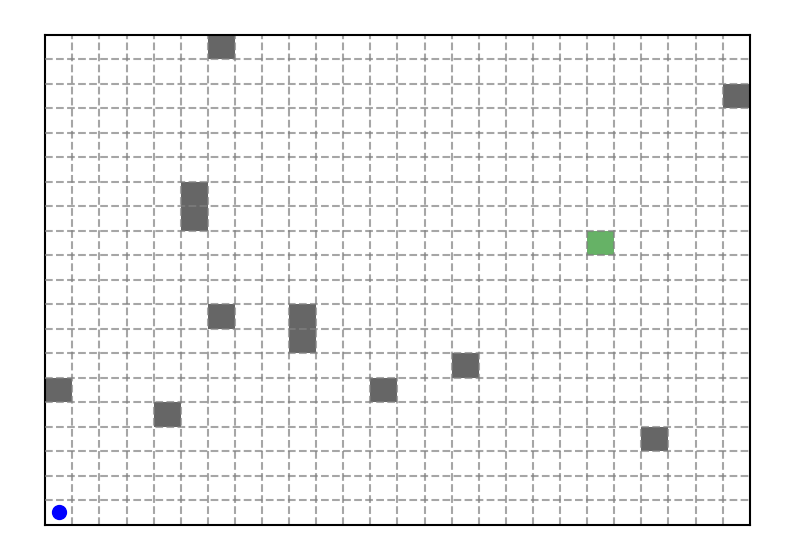

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
#plt.xkcd()
num_cols = 26
num_rows = 20
unit = 1 

#board[1, 1] = 2
#board[0, 3] = 1
#board[1, 3] = -1
fig_size=(10,7)

def reset_env(reward_num, track_num, obs_num):
  total_num = reward_num + track_num + obs_num
  board = np.zeros((num_rows, num_cols))
  start_pos = (0,0)
  board_set =[]
  reward_point = []
  obs_point = []
# board[2][1] = 1
  if total_num > num_cols*num_rows:
       #assert("ArithmeticError")
       print("out of  boardsize!")
       return
  else:     
       for i in range(total_num):
             if i < reward_num:
                   while len(board_set) < i + 1:
                     m , n = random.randint(0, num_rows-1), random.randint(0, num_cols-1)
                     if ((m,n) not in board_set):#& ((m,n) != start_pos)
                           board_set.append((m,n))
                           board[m][n] = 1
                           reward_point.append((m,n))
#                elif i < reward_num + track_num:
#                    while len(board_set) < i + 1:
#                        m , n = random.randint(0, num_rows-1), random.randint(0, num_cols-1)
#                        if (m,n) not in board_set:
#                              board_set.append((m,n))
#                              board[m][n] = -1
             else:
                   while len(board_set) < i + 1:
                     m , n = random.randint(0, num_rows-1), random.randint(0, num_cols-1)
                     if ((m,n) not in board_set):# & ((m,n) != start_pos)
                           board_set.append((m,n))
                           board[m][n] = 2
                           obs_point.append((m,n))
  return board, reward_point, obs_point
            


def draw_pic(board,bot_pos):
        fig,ax=plt.subplots(figsize=fig_size)
        ax.axis('off')

        for i in range(num_cols + 1):
                    if i == 0 or i == num_cols:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                color='black')
                    else:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows + 1):
                    if i == 0 or i == num_rows:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                color='black')
                    else:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows):
                    for j in range(num_cols):
                        y = (i) * unit
                        x = j * unit
                        if board[i, j] == 2:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == 1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == -1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                                     alpha=0.6)
                            ax.add_patch(rect)
        i, j = bot_pos[0], bot_pos[1]
        y = (i) * unit
        x = j * unit
        ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker="o",
                linestyle='none', markersize=max(fig_size)*unit, color='blue')
        if board[i, j] != 0:
            ax.text(fig_size[0] / 3, fig_size[1] * 2 / 3,
                    s="episode ends, reward: {:.2f}".format(2))
        plt.show()
def draw_trace(board,bot_pos_comb):
        fig,ax=plt.subplots(figsize=fig_size)
        ax.axis('off')

        for i in range(num_cols + 1):
                    if i == 0 or i == num_cols:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                color='black')
                    else:
                        ax.plot([i * unit, i * unit], [0, num_rows * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows + 1):
                    if i == 0 or i == num_rows:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                color='black')
                    else:
                        ax.plot([0, num_cols * unit], [i * unit, i * unit],
                                alpha=0.7, color='grey', linestyle='dashed')
        for i in range(num_rows):
                    for j in range(num_cols):
                        y = (i) * unit
                        x = j * unit
                        if board[i, j] == 2:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == 1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                                     alpha=0.6)
                            ax.add_patch(rect)
                        elif board[i, j] == -1:
                            rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                                     alpha=0.6)
                            ax.add_patch(rect)
        for dot in bot_pos_comb:
            #i, j = bot_pos_comb[k][0], bot_pos_comb[k][1]
            i, j = dot[0], dot[1]
            y = (i) * unit
            x = j * unit
            ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker="o",
                    linestyle='none', markersize=max(fig_size)*unit, color='blue')
            if board[i, j] != 0:
                ax.text(fig_size[0] / 3, fig_size[1] * 2 / 3,
                        s="episode ends, reward: {:.2f}".format(2))
        plt.show()
      
board, reward_point, _ = reset_env(1,2,10)
draw_pic(board, bot_pos=(0,0))
#for i in range(num_rows):
#    for j in range(num_cols):
#        draw_pic(board, bot_pos=(i,j))
        #plt.pause(1)


# add aligient

In [2]:
class Robot:

    def __init__(self, num_actions):
        self.num_actions = num_actions

    def choose_action(self, state, reward_point):
        del state
        return np.random.randint(self.num_actions)

class Aligient:
    def __init__(self, board):
        self.board = board
        self.num_rows, self.num_cols = board.shape
        self.num_states = self.num_rows * self.num_cols
        self.num_actions = 4
        self.reward_table = self.get_reward_table()
        self.transition_model = self.get_transition_model()
        self.start_pos = (0, 0)
        self.trace = {self.start_pos}
    def choose_action(self, state, reward_point):
        cur_pos = self.get_pos_from_state(state)
        rate = 0.05
        del state
        if (reward_point[0][0] - cur_pos[0] )> 0:
            action = np.random.choice(4, p=[rate,rate,1-3*rate,rate])
            #action = 2
        elif (reward_point[0][0] - cur_pos[0] )< 0:
            action = np.random.choice(4, p=[1-3*rate,rate,rate,rate])
            #action = 0
        elif (reward_point[0][1] - cur_pos[1] )> 0:
            action = np.random.choice(4, p=[rate,1-3*rate,rate,rate])
            #action = 1
        elif (reward_point[0][1] - cur_pos[1] )< 0 :
            action = np.random.choice(4, p=[rate,rate,rate,1-3*rate])
            #action = 3
        return action


    def get_state_from_pos(self, pos):
        """Maps (x, y) position on the board to state index
        """
        return pos[0] * self.num_cols + pos[1]
    def get_pos_from_state(self, state):
        """Maps state index to (x, y) position on the board
        """
        return state // self.num_cols, state % self.num_cols
    def get_reward_table(self):
        """Map each state to its corresponding reward.
        """
        reward_table = np.zeros(self.num_states)
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                reward_table[s] = self.board[r, c]
        return reward_table
    def get_transition_model(self, random_rate=0.1):
        """The transition_model describing the probability of environment 
        next state (s') given that we are currently at state (s) and take 
        P = P[s' | (s, a)]
        """
        transition_model = np.zeros(
            (self.num_states, self.num_actions, self.num_states))
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                possible_s_prime = np.zeros(self.num_actions)
                if self.board[r, c] == 0:
                    for a in range(self.num_actions):
                        new_r, new_c = r, c
                        if a == 0:
                            new_r = max(r - 1, 0)  #go to south
                        elif a == 1:
                            new_c = min(c + 1, self.num_cols - 1) #go to east
                        elif a == 2:
                            new_r = min(r + 1, self.num_rows - 1) #go to north
                        elif a == 3:
                            new_c = max(c - 1, 0)  # go to west
                        if self.board[new_r, new_c] == 2:  #detect obstacle
                            new_r, new_c = r, c
                        s_prime = self.get_state_from_pos((new_r, new_c))
                        possible_s_prime[a] = s_prime   
                else:
                    possible_s_prime = np.ones(self.num_actions) * s   #over
                for a in range(self.num_actions):
                    transition_model[s, a, int(
                        possible_s_prime[a])] += 1 - random_rate
                    transition_model[s, a, int(
                        possible_s_prime[(a + 1) % self.num_actions])] += random_rate/2
                    transition_model[s, a, int(
                        possible_s_prime[(a - 1) % self.num_actions])] += random_rate/2
        return transition_model
    def reset(self):
        
        self.cur_state = self.get_state_from_pos(self.start_pos)
        self.reward = 0
        return self.cur_state
    def step(self, action):
        p = self.transition_model[self.cur_state, action]
        next_state = np.random.choice(self.num_states, p=p)
        self.reward = self.reward_table[next_state]
        self.cur_state = next_state
        self.trace.add(self.get_pos_from_state(self.cur_state))
        done = False
        if self.reward != 0:
            done = True
        return self.cur_state, self.trace, self.reward, done, []


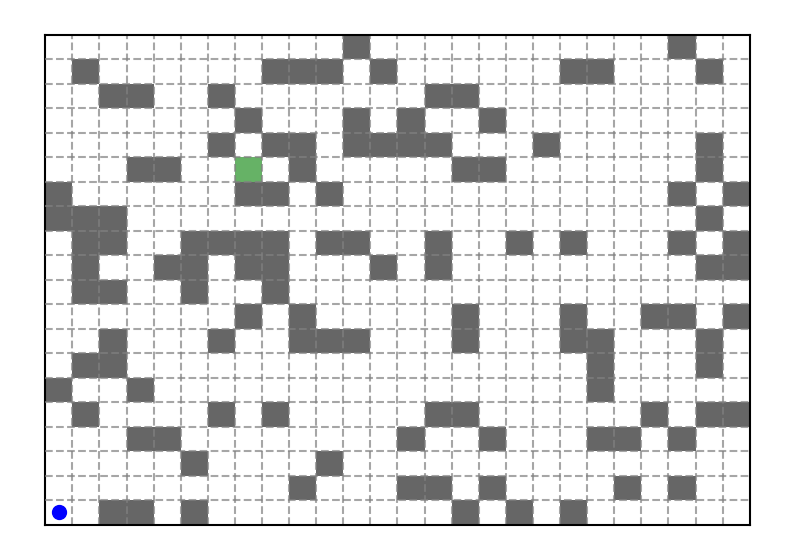

UnboundLocalError: local variable 'action' referenced before assignment

In [3]:
env = Aligient(board)
board, reward_point, _ = reset_env(1,22,100)
agent = Robot(4)
num_episodes = 1
for i in range(num_episodes):
    state = env.reset()
    draw_pic(board, bot_pos=(0,0))
    while True:
        action = env.choose_action(state, reward_point)
        state, trace, reward, done, info = env.step(action)
        #pos = env.get_pos_from_state(state)
        #draw_pic(board, pos)
        if done:
            draw_trace(board, trace)
            break